In [74]:
# http://blog.districtdatalabs.com/data-exploration-with-python-2

import os
import zipfile
import requests

import pandas as pd
import numpy as np

In [2]:
def download_data(url, name, path='data'):
    if not os.path.exists(path):
        os.mkdir(path)

    response = requests.get(url)
    with open(os.path.join(path, name), 'wb') as f:
        f.write(response.content)

    z = zipfile.ZipFile(os.path.join(path, 'vehicles.zip'))
    z.extractall(path)

In [3]:
VEHICLES = 'http://bit.ly/ddl-cars'

download_data(VEHICLES, 'vehicles.zip')

In [4]:
path = 'data'
vehicles = pd.read_csv(os.path.join(path, 'vehicles.csv'))
vehicles.head()

C:\Users\Orhan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [5]:
select_columns = ['make', 'model', 'year', 'displ', 'cylinders', 'trany', 'drive', 'VClass',
                  'fuelType','barrels08', 'city08', 'highway08', 'comb08', 'co2TailpipeGpm', 'fuelCost08']

vehicles = vehicles[select_columns][vehicles.year <= 2016].drop_duplicates().dropna()

vehicles = vehicles.sort_values(['make', 'model', 'year'])

vehicles.columns = ['Make','Model','Year','Engine Displacement','Cylinders',
                    'Transmission','Drivetrain','Vehicle Class','Fuel Type',
                    'Fuel Barrels/Year','City MPG','Highway MPG','Combined MPG',
                    'CO2 Emission Grams/Mile','Fuel Cost/Year']

In [6]:
print(vehicles.shape)
vehicles.head()

(35095, 15)


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
19316,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
19314,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
358,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
369,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
25797,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


## Aggregating to Higher-Level Categories

In [7]:
def unique_col_values(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[column].unique()), df[column].dtype))
        
unique_col_values(vehicles)

Make | 126 | object
Model | 3490 | object
Year | 33 | int64
Engine Displacement | 65 | float64
Cylinders | 9 | float64
Transmission | 44 | object
Drivetrain | 7 | object
Vehicle Class | 34 | object
Fuel Type | 13 | object
Fuel Barrels/Year | 116 | float64
City MPG | 48 | int64
Highway MPG | 49 | int64
Combined MPG | 46 | int64
CO2 Emission Grams/Mile | 550 | float64
Fuel Cost/Year | 55 | int64


In [9]:
vehicles['Transmission'].value_counts()

Automatic 4-spd                     10582
Manual 5-spd                         7764
Automatic 3-spd                      2597
Automatic (S6)                       2455
Manual 6-spd                         2336
Automatic 5-spd                      2171
Automatic 6-spd                      1351
Manual 4-spd                         1306
Automatic (S5)                        822
Automatic (S8)                        774
Automatic (variable gear ratios)      643
Automatic 7-spd                       630
Automatic (S7)                        238
Automatic (S4)                        229
Auto(AM-S7)                           211
Automatic 8-spd                       207
Auto(AV-S6)                           135
Auto(AM7)                             124
Auto(AM6)                             103
Auto(AM-S6)                            82
Manual 3-spd                           74
Manual 7-spd                           56
Auto(AV-S7)                            54
Automatic 9-spd                   

In [10]:
AUTOMATIC = "Automatic"
MANUAL = "Manual"

vehicles.loc[vehicles['Transmission'].str.startswith('Auto'),'Transmission Type'] = AUTOMATIC
vehicles.loc[vehicles['Transmission'].str.startswith('Man'),'Transmission Type'] = MANUAL

In [11]:
vehicles['Transmission Type'].value_counts()

Automatic    23556
Manual       11539
Name: Transmission Type, dtype: int64

In [12]:
vehicles['Vehicle Class'].value_counts()

Compact Cars                          5048
Subcompact Cars                       4273
Midsize Cars                          3951
Standard Pickup Trucks                2311
Sport Utility Vehicle - 4WD           2081
Two Seaters                           1724
Large Cars                            1678
Sport Utility Vehicle - 2WD           1615
Special Purpose Vehicles              1404
Small Station Wagons                  1344
Minicompact Cars                      1165
Standard Pickup Trucks 2WD            1125
Vans                                  1121
Standard Pickup Trucks 4WD             938
Midsize-Large Station Wagons           633
Special Purpose Vehicle 2WD            570
Small Pickup Trucks                    524
Vans, Cargo Type                       432
Midsize Station Wagons                 413
Small Sport Utility Vehicle 4WD        412
Small Pickup Trucks 2WD                398
Standard Sport Utility Vehicle 4WD     343
Minivan - 2WD                          324
Small Sport

In [13]:
d = {}

d['Small Cars'] = ['Compact Cars','Subcompact Cars','Two Seaters','Minicompact Cars']
d['Midsize Cars'] = ['Midsize Cars']
d['Large Cars'] = ['Large Cars']

d

{'Large Cars': ['Large Cars'],
 'Midsize Cars': ['Midsize Cars'],
 'Small Cars': ['Compact Cars',
  'Subcompact Cars',
  'Two Seaters',
  'Minicompact Cars']}

In [14]:
for k, v in d.items():
    vehicles.loc[vehicles['Vehicle Class'].isin(v), 'Vehicle Category'] = k

In [15]:
vehicles['Vehicle Category'].value_counts()

Small Cars      12210
Midsize Cars     3951
Large Cars       1678
Name: Vehicle Category, dtype: int64

In [18]:
vehicles[['Make', 'Model']].sample(20)

,Make,Model
16926,Pontiac,Solstice
3279,Ford,Escort
31855,Plymouth,Gran Fury
7936,Infiniti,QX4 2WD
9805,Subaru,Legacy/Outback Wagon AWD
3214,Mercedes-Benz,S320
5584,Plymouth,Neon
7633,Ford,Ranger Pickup Cab Chassis
11475,Lexus,GX 470
14939,Lexus,LS 460


In [35]:
vehicles['Model Type'] = vehicles['Make'] + ' ' + vehicles['Model'].str.split().str.get(0)

In [38]:
vehicles['Fuel Type'].value_counts()

Regular                        23208
Premium                         9509
Gasoline or E85                 1157
Diesel                           906
Premium or E85                   116
Midgrade                          64
CNG                               60
Gasoline or natural gas           20
Premium Gas or Electricity        16
Premium and Electricity           16
Regular Gas and Electricity       14
Gasoline or propane                8
Regular Gas or Electricity         1
Name: Fuel Type, dtype: int64

In [40]:
vehicles['Gas'] = 0
vehicles['Ethanol'] = 0
vehicles['Electric'] = 0
vehicles['Propane'] = 0
vehicles['Natural Gas'] = 0

vehicles.loc[vehicles['Fuel Type'].str.contains('Regular|Gasoline|Midgrade|Premium|Diesel'), 'Gas'] = 1
vehicles.loc[vehicles['Fuel Type'].str.contains('E85'), 'Ethanol'] = 1
vehicles.loc[vehicles['Fuel Type'].str.contains('Electricity'), 'Electric'] = 1
vehicles.loc[vehicles['Fuel Type'].str.contains('propane'), 'Propane'] = 1
vehicles.loc[vehicles['Fuel Type'].str.contains('natural|CNG'), 'Natural Gas'] = 1

In [46]:
vehicles['Gas'].value_counts(normalize=True,dropna=False)

1    0.99829
0    0.00171
Name: Gas, dtype: float64

In [47]:
vehicles.loc[vehicles['Fuel Type'].str.contains('Regular|Gasoline'),'Gas Type'] = 'Regular'
vehicles.loc[vehicles['Fuel Type'] == 'Midgrade','Gas Type'] = 'Midgrade'
vehicles.loc[vehicles['Fuel Type'].str.contains('Premium'),'Gas Type'] = 'Premium'
vehicles.loc[vehicles['Fuel Type'] == 'Diesel','Gas Type'] = 'Diesel'
vehicles.loc[vehicles['Fuel Type'].str.contains('natural|CNG'),'Gas Type'] = 'Natural'

## Creating Categories from Continuous Variables

In [53]:
efficiency_categories = ['Very Low Efficiency', 'Low Efficiency','Moderate Efficiency',
                         'High Efficiency','Very High Efficiency']

vehicles['Fuel Efficiency'] = pd.qcut(vehicles['Combined MPG'], 5, efficiency_categories)
vehicles['Fuel Efficiency'].value_counts(normalize=True)

Very Low Efficiency     0.258299
High Efficiency         0.199601
Very High Efficiency    0.196666
Moderate Efficiency     0.178202
Low Efficiency          0.167232
Name: Fuel Efficiency, dtype: float64

In [55]:
vehicles.groupby('Fuel Efficiency')['Combined MPG'].mean()

Fuel Efficiency
Very Low Efficiency     14.206067
Low Efficiency          17.596354
Moderate Efficiency     19.485289
High Efficiency         21.803141
Very High Efficiency    27.543755
Name: Combined MPG, dtype: float64

In [56]:
engine_categories = ['Very Small Engine', 'Small Engine','Moderate Engine','Large Engine', 'Very Large Engine']

vehicles['Engine Size'] = pd.qcut(vehicles['Engine Displacement'], 5, engine_categories)

In [57]:
emission_categories = ['Very Low Emissions', 'Low Emissions','Moderate Emissions',
                       'High Emissions','Very High Emissions']

vehicles['Emissions'] = pd.qcut(vehicles['CO2 Emission Grams/Mile'],5, emission_categories)

In [58]:
fuelcost_categories = ['Very Low Fuel Cost', 'Low Fuel Cost','Moderate Fuel Cost',
                       'High Fuel Cost','Very High Fuel Cost']

vehicles['Fuel Cost'] = pd.qcut(vehicles['Fuel Cost/Year'], 5, fuelcost_categories)

## Clustering to Create Additional Categories

The first thing we are going to do is isolate the columns we want to use for clustering. These are going to be columns with numeric values, as the clustering algorithm will need to compute distances in order to group similar vehicles together.

In [59]:
cluster_columns = ['Engine Displacement','Cylinders','Fuel Barrels/Year',
                   'City MPG','Highway MPG','Combined MPG',
                   'CO2 Emission Grams/Mile', 'Fuel Cost/Year']

Ways to normalize and scale variables: http://scikit-learn.org/stable/modules/preprocessing.html

We use `MaxAbsScaler` which will divide each value by the max absolute value for that feature. This will preserve the distributions in the data and convert the values in each field to a number between 0 and 1 (technically -1 and 1, but we don't have any negatives).

In [61]:
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler()

vehicle_clusters = scaler.fit_transform(vehicles[cluster_columns])
vehicle_clusters = pd.DataFrame(vehicle_clusters, columns=cluster_columns)

### kmeans_cluster

In [77]:
model = KMeans(n_clusters=8, random_state=1)
clusters = model.fit_predict(vehicle_clusters)
clusters

array([3, 6, 6, ..., 5, 5, 5])

In [85]:
print(vehicle_clusters.shape)
print(clusters.size)
print(np.unique(clusters)) # We have 8 clusters assigned now

(35095, 8)
35095
[0 1 2 3 4 5 6 7]


In [87]:
cluster_results = vehicle_clusters.copy()
cluster_results['Cluster'] = clusters
cluster_results.head()

,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,Cluster
0,0.297619,0.250,0.411765,0.310345,0.278689,0.303571,0.411765,0.336207,3
1,0.500000,0.375,0.538462,0.224138,0.213115,0.232143,0.538462,0.439655,6
2,0.297619,0.250,0.437500,0.275862,0.278689,0.285714,0.437500,0.362069,6
3,0.500000,0.375,0.538462,0.224138,0.213115,0.232143,0.538462,0.439655,6
4,0.452381,0.375,0.437500,0.241379,0.344262,0.285714,0.437500,0.439655,6


### summarize_clustering

In [102]:
cluster_size = cluster_results.groupby('Cluster').size().reset_index()
cluster_size.columns = ['Cluster', 'Count']
cluster_size

,Cluster,Count
0,0,6334
1,1,2912
2,2,3999
3,3,5838
4,4,7704
5,5,1826
6,6,4766
7,7,1716


In [116]:
cluster_size = cluster_results.groupby(['Cluster']).size().reset_index()
cluster_size.columns = ['Cluster', 'Count']
cluster_size

,Cluster,Count
0,0,6334
1,1,2912
2,2,3999
3,3,5838
4,4,7704
5,5,1826
6,6,4766
7,7,1716


In [117]:
cluster_means = cluster_results.groupby(['Cluster'], as_index=False).mean()
cluster_means

,Cluster,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,0,0.241518,0.254243,0.281230,0.383366,0.487341,0.447303,0.281191,0.240410
1,1,0.595553,0.500215,0.395664,0.262860,0.360903,0.315677,0.400217,0.364192
2,2,0.631932,0.501500,0.495338,0.218378,0.281825,0.255475,0.495517,0.422733
3,3,0.267466,0.253950,0.346015,0.314615,0.392238,0.363536,0.345953,0.298589
4,4,0.382627,0.374854,0.353653,0.297454,0.405367,0.355896,0.353625,0.314951
5,5,0.200601,0.244660,0.215546,0.518356,0.616882,0.587946,0.216954,0.183282
6,6,0.446931,0.373387,0.437697,0.249606,0.310320,0.287299,0.437672,0.371041
7,7,0.682005,0.570950,0.601364,0.178472,0.234963,0.210290,0.601190,0.544153


In [118]:
cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
cluster_summary

,Cluster,Count,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,0,6334,0.241518,0.254243,0.281230,0.383366,0.487341,0.447303,0.281191,0.240410
1,1,2912,0.595553,0.500215,0.395664,0.262860,0.360903,0.315677,0.400217,0.364192
2,2,3999,0.631932,0.501500,0.495338,0.218378,0.281825,0.255475,0.495517,0.422733
3,3,5838,0.267466,0.253950,0.346015,0.314615,0.392238,0.363536,0.345953,0.298589
4,4,7704,0.382627,0.374854,0.353653,0.297454,0.405367,0.355896,0.353625,0.314951
5,5,1826,0.200601,0.244660,0.215546,0.518356,0.616882,0.587946,0.216954,0.183282
6,6,4766,0.446931,0.373387,0.437697,0.249606,0.310320,0.287299,0.437672,0.371041
7,7,1716,0.682005,0.570950,0.601364,0.178472,0.234963,0.210290,0.601190,0.544153


In [63]:
from sklearn.cluster import KMeans

def kmeans_cluster(df, n_clusters=2):
    model = KMeans(n_clusters=n_clusters, random_state=1)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

In [64]:
def summarize_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    return cluster_summary

In [119]:
cluster_results = kmeans_cluster(vehicle_clusters, 8)
cluster_summary = summarize_clustering(cluster_results)
cluster_summary

,Cluster,Count,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,0,6334,0.241518,0.254243,0.281230,0.383366,0.487341,0.447303,0.281191,0.240410
1,1,2912,0.595553,0.500215,0.395664,0.262860,0.360903,0.315677,0.400217,0.364192
2,2,3999,0.631932,0.501500,0.495338,0.218378,0.281825,0.255475,0.495517,0.422733
3,3,5838,0.267466,0.253950,0.346015,0.314615,0.392238,0.363536,0.345953,0.298589
4,4,7704,0.382627,0.374854,0.353653,0.297454,0.405367,0.355896,0.353625,0.314951
5,5,1826,0.200601,0.244660,0.215546,0.518356,0.616882,0.587946,0.216954,0.183282
6,6,4766,0.446931,0.373387,0.437697,0.249606,0.310320,0.287299,0.437672,0.371041
7,7,1716,0.682005,0.570950,0.601364,0.178472,0.234963,0.210290,0.601190,0.544153


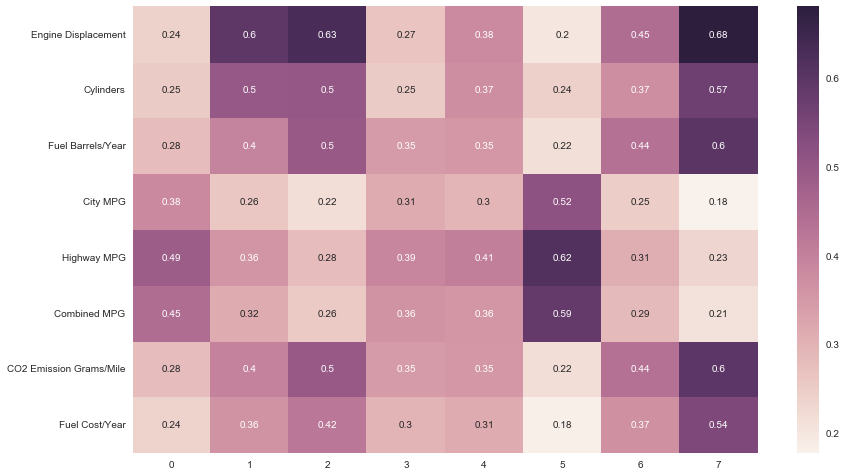

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

sns.heatmap(cluster_summary[cluster_columns].transpose(), annot=True)

- Clusters 3,4 look pretty similar
- Clusters 1,2,6,7 also look similar

So let's reduce the number of clusters and have a look again

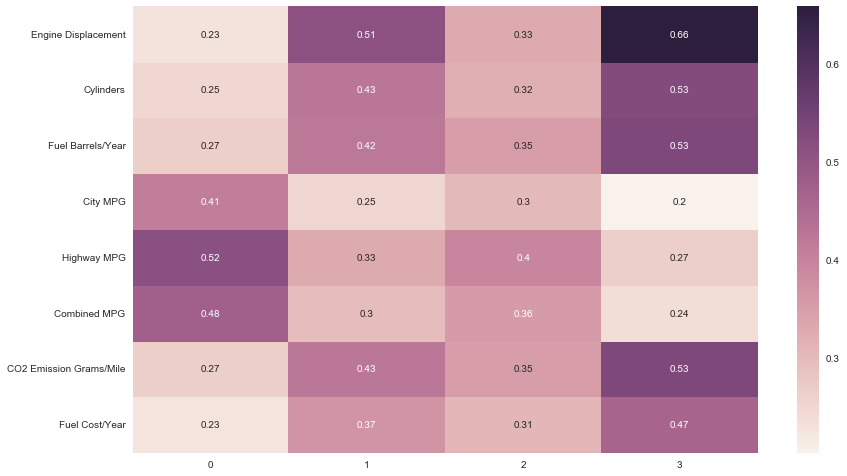

In [138]:
cluster_results = kmeans_cluster(vehicle_clusters, 4)
cluster_summary = summarize_clustering(cluster_results)

sns.heatmap(cluster_summary[cluster_columns].transpose(), annot=True)

In [143]:
cluster_summary

,Cluster,Count,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,0,8195,0.230890,0.251411,0.266962,0.413265,0.515462,0.478114,0.267262,0.227753
1,1,8188,0.513292,0.428325,0.423538,0.253255,0.329058,0.296837,0.425091,0.370426
2,2,13603,0.330854,0.322369,0.352043,0.303940,0.397599,0.357866,0.352017,0.308864
3,3,5109,0.659905,0.527770,0.533567,0.204116,0.266030,0.239825,0.533659,0.465684


In [155]:
vehicles['Cluster'] = cluster_results['Cluster']
vehicles['Cluster'][vehicles['Cluster']==0] = 'Midsized Balanced'
vehicles['Cluster'][vehicles['Cluster']==1] = 'Large Inefficient'
vehicles['Cluster'][vehicles['Cluster']==2] = 'Large Moderately Efficient'
vehicles['Cluster'][vehicles['Cluster']==3] = 'Small Very Efficient'

C:\Users\Orhan\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Orhan\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Orhan\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Orhan\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWa

In [157]:
vehicles.sample(10)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,...,Ethanol,Electric,Propane,Natural Gas,Gas Type,Fuel Efficiency,Engine Size,Emissions,Fuel Cost,Cluster
22671,Suzuki,SX4 Sport/Anniversary Edition,2011,2.0,4.0,Manual 6-spd,Front-Wheel Drive,Compact Cars,Regular,12.677308,...,0,0,0,0,Regular,Very High Efficiency,Very Small Engine,Very Low Emissions,Very Low Fuel Cost,Large Moderately Efficient
34575,Jeep,Comanche Pickup 2WD,1990,2.5,4.0,Manual 4-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,16.480500,...,0,0,0,0,Regular,Moderate Efficiency,Small Engine,Low Emissions,Low Fuel Cost,Large Moderately Efficient
25259,Mercedes-Benz,E350 4Matic,2013,3.5,6.0,Automatic 7-spd,4-Wheel Drive,Midsize Cars,Premium or E85,14.982273,...,1,0,0,0,Premium,High Efficiency,Moderate Engine,Low Emissions,Moderate Fuel Cost,Midsized Balanced
5543,Ford,Escort,1999,2.0,4.0,Manual 5-spd,Front-Wheel Drive,Compact Cars,Regular,11.771786,...,0,0,0,0,Regular,Very High Efficiency,Very Small Engine,Very Low Emissions,Very Low Fuel Cost,Small Very Efficient
24307,Ford,F150 Pickup 4WD FFV,2012,3.7,6.0,Automatic (S6),Part-time 4-Wheel Drive,Standard Pickup Trucks 4WD,Gasoline or E85,18.311667,...,1,0,0,0,Regular,Low Efficiency,Large Engine,Moderate Emissions,Moderate Fuel Cost,Midsized Balanced
9354,Hyundai,Tiburon,2003,2.7,6.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,16.480500,...,0,0,0,0,Regular,Moderate Efficiency,Moderate Engine,Low Emissions,Low Fuel Cost,Small Very Efficient
2614,Ford,E150 Econoline 2WD,1995,5.0,8.0,Automatic 4-spd,Rear-Wheel Drive,Vans,Regular,23.543571,...,0,0,0,0,Regular,Very Low Efficiency,Very Large Engine,Very High Emissions,Very High Fuel Cost,Small Very Efficient
10107,Nissan,Xterra V6 2WD,2003,3.3,6.0,Manual 5-spd,Rear-Wheel Drive,Sport Utility Vehicle - 2WD,Regular,19.388824,...,0,0,0,0,Regular,Low Efficiency,Moderate Engine,High Emissions,Moderate Fuel Cost,Large Moderately Efficient
29222,Chrysler,200 AWD,2016,3.6,6.0,Automatic 9-spd,All-Wheel Drive,Midsize Cars,Gasoline or E85,14.982273,...,1,0,0,0,Regular,High Efficiency,Large Engine,Low Emissions,Low Fuel Cost,Small Very Efficient
20522,Mazda,6,2010,2.5,4.0,Manual 6-spd,Front-Wheel Drive,Midsize Cars,Regular,14.330870,...,0,0,0,0,Regular,High Efficiency,Small Engine,Very Low Emissions,Very Low Fuel Cost,Large Moderately Efficient
